# Working With Missing And Duplicate Data

## 1. Introduction

We're gonna learn how to handle missing  and duplicate data

missing/duplicate data might appear while combining, reindexing, and reshaping data
might exist bc of user input error or data storage/conversion issues
might also be used to indicate that data is unavailable

We've learned to handle missing data by
1. removing rows with missing values
2. removing columns with missing vals
3. fill missing vals with other vals
4. leave missing vals as is

We'll go into more detail of these options

data set: World Happinesss report 2015/2016/2017 (updated countries)

In [13]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# open files into dataframes
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')

# Gather info about the dataframes
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

## 2. Identifying Missing Values

each data set contains the same number of rows

Each likely contains missing values because they were updated to countain same countries
missing values reps as Nan or None
may indicate data is missing instead of Null

use Series.isnull() to identify rows with missing values
might be easier to get summary df.isnull().sum()

In [14]:
# We need to confirm number of missing values in happiness2016 and happiness2017
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()


In [17]:
missing_2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [18]:
missing_2017

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

## 3. Correcting Data Cleaning Errors that Result in Missing Value

For all three data sets missing values exist in all columns except Country and Year
Workflow for cleaning missing values
1. Check for errors in data cleaning/tranformation
2. use data from additional sources to fill missing values
3. drop row/column
4. fill missing values with reasonable estimates compute from the available data

Recall, can use pd.concat to combine data sets


In [19]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

# Check for missing values in combined
combined.isnull().sum()


/home/lumenetix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

df has missing values and they follow a pattern.
177 missing values or 337 missing values
some column names only differe by punctuation => error combining data


In [22]:
# now we clean the columns names
# rename columns
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.replace('(','').str.replace(')','').str.upper()
happiness2016.columns = happiness2016.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.replace('(','').str.replace(')','').str.upper()
happiness2015.columns = happiness2015.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.replace('(','').str.replace(')','').str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

missing = combined.isnull().sum()
missing

/home/lumenetix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

## 4. Visualizing Missing Data

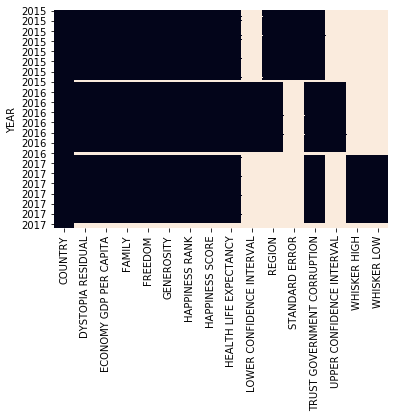

In [23]:
# There are still values missing
# can use heatmap to learn about missing values
# we can use seaborn library for this.

# reset index to 'YEAR'
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)


In [ ]:
#we can observe that:
# - no vals are missing in COUNTRY column
# - some vals missing in all data set columns excetp COUNTRY
# - some cols have data populated for 1 year
# - REGION data might be missing for 2017

#Let's check REGION

In [24]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()

## 5. Using Data from additional sources to fill in missing values

In [25]:
# REGION is missing from 2017 data
#  We need region to analyze data

# we can use region from other years because region is a fixed val that corresponds to
# a country

# strategy:
# 1. creat df containing all countries and corresponding regions from the 3 data sets
# 2. use pd.merg() to assigne REGION in df to corresponding country in combined
# 3. result will have 2 region columns. REGION_x and REGION_y. drop REGION_x


combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
combined = combined.drop('REGION_x', axis=1)
missing = combined.isnull().sum()


NameError: name 'regions' is not defined

## 6. Identifying Duplicates Values

## 7. Correctin Duplicates Values

## 8. Handle Missing Values by Dropping Columns

## 9. Handle missing Value by Dropping Columns (Cont.)

## 10. Analyzing Missing Data

## 11. Handling Missing Values with Imputation

## 12. Dropping Rows